In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

In [2]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="model_klasifikasi_sampah.tflite")
interpreter.allocate_tensors()

# Ambil detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

C:\Users\iksan\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


biological_12.jpg: sisa_makanan_dan_dedaunan (100.00%)
biological_2.jpg: sisa_makanan_dan_dedaunan (99.83%)
biological_24.jpg: sisa_makanan_dan_dedaunan (99.59%)
biological_25.jpg: sisa_makanan_dan_dedaunan (92.76%)
biological_32.jpg: sisa_makanan_dan_dedaunan (67.73%)
biological_354.jpg: sisa_makanan_dan_dedaunan (97.36%)
biological_49.jpg: sisa_makanan_dan_dedaunan (34.67%)
biological_57.jpg: sisa_makanan_dan_dedaunan (99.99%)
botol_kaca1.jpg: logam (55.62%)
botol_kaca3.jpg: botol (99.98%)
botol_marjan.jpg: botol (93.11%)
botol_plastik.jpg: botol (99.99%)
can.jpg: kaleng (100.00%)
cardboard.jpg: kardus (100.00%)
food.jpg: sisa_makanan_dan_dedaunan (100.00%)
glass.jpg: botol (76.67%)
glass_521.jpg: kaca (99.69%)
glass_527.jpg: kaca (100.00%)
glass_546.jpg: kaca (99.99%)
glass_712.jpg: kaca (100.00%)
glass_910.jpg: kaca (98.72%)
hp.jpg: elektronik (100.00%)
kantong_plastik.jpg: kemasan_plastik (26.90%)
laptop.jpg: elektronik (100.00%)
laptop2.jpg: elektronik (99.63%)
laptop3.jpg: elekt

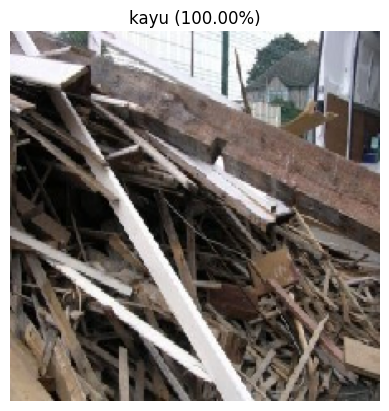

In [3]:
# Label sesuai urutan saat training
class_names = [
    'botol', 'kaca', 'kaleng', 'kantong_plastik', 'kardus',
    'kemasan_plastik', 'kertas', 'logam',
    'baterai', 'elektronik', 'kayu', 'sisa_makanan_dan_dedaunan'
]

# Folder gambar uji
test_dir = 'tes'
image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files:
    img_path = os.path.join(test_dir, img_file)

    # Load & preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

    # Masukkan ke input tensor
    interpreter.set_tensor(input_details[0]['index'], img_array)

    # Jalankan inferensi
    interpreter.invoke()

    # Ambil hasil output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    pred_index = np.argmax(output_data)
    pred_label = class_names[pred_index]
    confidence = np.max(output_data) * 100

    # Tampilkan hasil
    print(f"{img_file}: {pred_label} ({confidence:.2f}%)")

    # (Opsional) tampilkan gambar
    plt.imshow(img)
    plt.title(f"{pred_label} ({confidence:.2f}%)")
    plt.axis('off')